# **Task 4**

Deadline: Wednesday at 11:59pm

1. **Data Exploration**
 * How many employees are in the dataset?
 * How many missing values exist in each column?
 * What are the unique job titles and departments?
 * Identify duplicate employee records and remove them.

2. **Data Cleaning**
 * Convert salaries from text to numeric (e.g., "$50,000" → 50000).
 * Standardize job titles (fix inconsistencies like “manager” vs. “Manager”) change everything to start with uppercase.
 * Fill missing values in performance scores using median or mean.
 * Detect and remove outliers in salary (any salaries too high/low?).
 * Convert date columns (e.g., "01-12-2023" as string → datetime format).

3. **Analysis**
 * What is the average salary of employees?
 * Which department has the highest average salary?
 * Which department has the lowest performance scores?
 * Which job title has the highest average salary?

4. **Department-Level Insights**
 * Which department has the most employees?
 * What is the salary distribution across departments?
 * Identify departments with the most missing data.

In [357]:
#import Datasheet
import pandas as pd
task = pd.read_csv("employee_performance_dataset.csv")
task


,Employee_ID,Name,Department,Job_Title,Salary,Experience_Years,Performance_Score,Join_Date
0,EMP1000,Employee_0,Marketing,Analyst,NaN,NaN,3.0,3/30/2018
1,EMP1001,Employee_1,Marketing,Coordinator,"$70,000",5.0,3.0,NaN
2,EMP1002,Employee_2,Customer Support,Manager,NaN,15.0,1.0,6/25/2019
3,EMP1003,Employee_3,Finance,Specialist,NaN,20.0,5.0,1/10/2020
4,EMP1004,Employee_4,Sales,Analyst,"$150,000",15.0,1.0,1/10/2020
...,...,...,...,...,...,...,...,...
1015,EMP1899,Employee_899,Customer Support,engineer,"$120,000",3.0,NaN,3/30/2018
1016,EMP1280,Employee_280,Customer Support,engineer,"$120,000",1.0,NaN,NaN
1017,EMP1883,Employee_883,Engineering,coordinator,NaN,NaN,4.0,3/30/2018
1018,EMP1761,Employee_761,Finance,analyst,"$50,000",15.0,5.0,9/15/2021


In [358]:
#number of employees in the datasheet
task.value_counts(["Name"])


Name        
Employee_136    2
Employee_319    2
Employee_660    2
Employee_513    2
Employee_280    2
               ..
Employee_995    1
Employee_996    1
Employee_997    1
Employee_998    1
Employee_119    1
Name: count, Length: 1000, dtype: int64

In [359]:
#missing values in each coloumn
missing_values = task.isnull().sum()
missing_values

Employee_ID            0
Name                   0
Department             0
Job_Title              0
Salary               123
Experience_Years     136
Performance_Score    162
Join_Date            157
dtype: int64

In [360]:
#get unique titles
unique_titles = task[['Job_Title' ,'Department']].drop_duplicates()
print(unique_titles)

       Job_Title        Department
0        Analyst         Marketing
1    Coordinator         Marketing
2        Manager  Customer Support
3     Specialist           Finance
4        Analyst             Sales
..           ...               ...
542    executive  Customer Support
578  coordinator  Customer Support
652      analyst             Sales
662      manager  Customer Support
741    executive       Engineering

[71 rows x 2 columns]


In [361]:
#identify duplicate records
duplicates=task.duplicated(keep=False)
duplicate_rows=task[duplicates]
print(duplicate_rows)

     Employee_ID          Name        Department    Job_Title     Salary  \
76       EMP1076   Employee_76       Engineering      manager   $70,000    
136      EMP1136  Employee_136         Marketing  coordinator  $120,000    
280      EMP1280  Employee_280  Customer Support     engineer  $120,000    
319      EMP1319  Employee_319         Marketing   specialist   $50,000    
411      EMP1411  Employee_411         Marketing  coordinator   $60,000    
513      EMP1513  Employee_513             Sales   specialist   $45,000    
521      EMP1521  Employee_521                HR      analyst   $70,000    
626      EMP1626  Employee_626       Engineering   specialist   $45,000    
636      EMP1636  Employee_636                HR     engineer   $50,000    
660      EMP1660  Employee_660           Finance   specialist  $120,000    
678      EMP1678  Employee_678  Customer Support      manager   $60,000    
737      EMP1737  Employee_737             Sales     engineer   $60,000    
740      EMP

In [362]:
#remove duplicates from employee records
duplicates=task.duplicated(subset='Employee_ID',keep=False)
duplicate_rows=task[duplicates]
print(duplicate_rows)

     Employee_ID          Name        Department    Job_Title     Salary  \
76       EMP1076   Employee_76       Engineering      manager   $70,000    
136      EMP1136  Employee_136         Marketing  coordinator  $120,000    
280      EMP1280  Employee_280  Customer Support     engineer  $120,000    
319      EMP1319  Employee_319         Marketing   specialist   $50,000    
411      EMP1411  Employee_411         Marketing  coordinator   $60,000    
513      EMP1513  Employee_513             Sales   specialist   $45,000    
521      EMP1521  Employee_521                HR      analyst   $70,000    
626      EMP1626  Employee_626       Engineering   specialist   $45,000    
636      EMP1636  Employee_636                HR     engineer   $50,000    
660      EMP1660  Employee_660           Finance   specialist  $120,000    
678      EMP1678  Employee_678  Customer Support      manager   $60,000    
737      EMP1737  Employee_737             Sales     engineer   $60,000    
740      EMP

In [363]:
#changing beginning of job titles to uppercase
task['Job_Title']=task['Job_Title'].str.title()
print(task)

     Employee_ID          Name        Department    Job_Title     Salary  \
0        EMP1000    Employee_0         Marketing      Analyst        NaN   
1        EMP1001    Employee_1         Marketing  Coordinator   $70,000    
2        EMP1002    Employee_2  Customer Support      Manager        NaN   
3        EMP1003    Employee_3           Finance   Specialist        NaN   
4        EMP1004    Employee_4             Sales      Analyst  $150,000    
...          ...           ...               ...          ...        ...   
1015     EMP1899  Employee_899  Customer Support     Engineer  $120,000    
1016     EMP1280  Employee_280  Customer Support     Engineer  $120,000    
1017     EMP1883  Employee_883       Engineering  Coordinator        NaN   
1018     EMP1761  Employee_761           Finance      Analyst   $50,000    
1019     EMP1319  Employee_319         Marketing   Specialist   $50,000    

      Experience_Years  Performance_Score  Join_Date  
0                  NaN          

In [364]:
# fill in the missing values of performance score using median
task['Performance_Score']=task['Performance_Score'].fillna(task['Performance_Score'].median())
print(task)

     Employee_ID          Name        Department    Job_Title     Salary  \
0        EMP1000    Employee_0         Marketing      Analyst        NaN   
1        EMP1001    Employee_1         Marketing  Coordinator   $70,000    
2        EMP1002    Employee_2  Customer Support      Manager        NaN   
3        EMP1003    Employee_3           Finance   Specialist        NaN   
4        EMP1004    Employee_4             Sales      Analyst  $150,000    
...          ...           ...               ...          ...        ...   
1015     EMP1899  Employee_899  Customer Support     Engineer  $120,000    
1016     EMP1280  Employee_280  Customer Support     Engineer  $120,000    
1017     EMP1883  Employee_883       Engineering  Coordinator        NaN   
1018     EMP1761  Employee_761           Finance      Analyst   $50,000    
1019     EMP1319  Employee_319         Marketing   Specialist   $50,000    

      Experience_Years  Performance_Score  Join_Date  
0                  NaN          

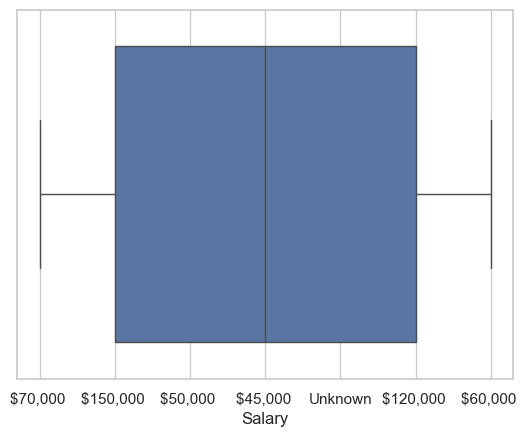

In [365]:
#detecting outliers of Salary
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=task['Salary'])
plt.show()

In [366]:
#converting join date to Datetime format
task['Join_Date']=pd.to_datetime(task['Join_Date'])
print(task)

     Employee_ID          Name        Department    Job_Title     Salary  \
0        EMP1000    Employee_0         Marketing      Analyst        NaN   
1        EMP1001    Employee_1         Marketing  Coordinator   $70,000    
2        EMP1002    Employee_2  Customer Support      Manager        NaN   
3        EMP1003    Employee_3           Finance   Specialist        NaN   
4        EMP1004    Employee_4             Sales      Analyst  $150,000    
...          ...           ...               ...          ...        ...   
1015     EMP1899  Employee_899  Customer Support     Engineer  $120,000    
1016     EMP1280  Employee_280  Customer Support     Engineer  $120,000    
1017     EMP1883  Employee_883       Engineering  Coordinator        NaN   
1018     EMP1761  Employee_761           Finance      Analyst   $50,000    
1019     EMP1319  Employee_319         Marketing   Specialist   $50,000    

      Experience_Years  Performance_Score  Join_Date  
0                  NaN          

In [ ]:
#Detarmining which depertment has the most employees
Department_counts = task['Department'].value_counts()
most_employees_department = Department_counts.idxmax()
most_emloyees_counts = Department_counts.max()
print(f"The department with the most employees is: {most_employees_department}")
print(f"Number of employees in {most_employees_department}: {most_emloyees_counts}")

The department with the most employees is: Customer Support
Number of employees in Customer Support: 182


  Employee_ID        Name        Department    Job_Title     Salary  \
0     EMP1000  Employee_0         Marketing      Analyst        NaN   
1     EMP1001  Employee_1         Marketing  Coordinator   $70,000    
2     EMP1002  Employee_2  Customer Support      Manager        NaN   
3     EMP1003  Employee_3           Finance   Specialist        NaN   
4     EMP1004  Employee_4             Sales      Analyst  $150,000    

   Experience_Years  Performance_Score  Join_Date  
0               NaN                3.0  3/30/2018  
1               5.0                3.0        NaN  
2              15.0                1.0  6/25/2019  
3              20.0                5.0  1/10/2020  
4              15.0                1.0  1/10/2020  


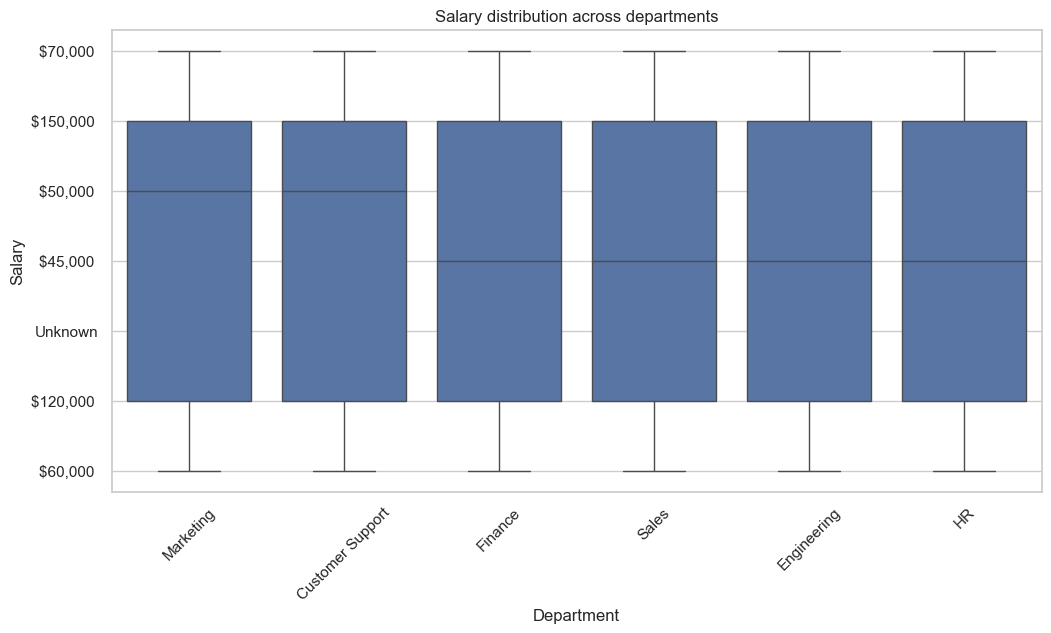

In [ ]:
#salary distribution across departments
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
task=pd.read_csv("employee_performance_dataset.csv")
print(task.head())
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.boxplot(x="Department",y="Salary",data=task)
plt.xticks(rotation=45)
plt.title("Salary distribution across departments")
plt.xlabel("Department")
plt.ylabel("Salary")
plt.show()

In [ ]:
#department with the most missing values
task = pd.read_csv('employee_performance_dataset.csv')
missing_values=task.isnull().sum()
if'Department'in task.columns:
    dept_missing = task.groupby('Department').apply(lambda x: x.isnull().sum().sum())
    dept_missing=dept_missing.sort_values(ascending=False)
    print(dept_missing)


Department
Customer Support    112
HR                  110
Marketing           101
Sales                88
Finance              87
Engineering          80
dtype: int64


C:\Users\PRO ELECTRONIC\AppData\Local\Temp\ipykernel_1528\412385477.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dept_missing = task.groupby('Department').apply(lambda x: x.isnull().sum().sum())


In [ ]:
#Converting from a string to an integer
task = pd.read_csv('employee_performance_dataset.csv')
if 'Salary' in task.columns:
    task['Salary'] = task['Salary'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
    task['Salary'] = pd.to_numeric(task['Salary'], errors='coerce')
    print(task[['Salary']].head())
else:
    Print("No 'Salary' column found in the dataset.")
    task

     Salary
0       NaN
1   70000.0
2       NaN
3       NaN
4  150000.0


In [ ]:
task

,Employee_ID,Name,Department,Job_Title,Salary,Experience_Years,Performance_Score,Join_Date
0,EMP1000,Employee_0,Marketing,Analyst,NaN,NaN,3.0,3/30/2018
1,EMP1001,Employee_1,Marketing,Coordinator,70000.0,5.0,3.0,NaN
2,EMP1002,Employee_2,Customer Support,Manager,NaN,15.0,1.0,6/25/2019
3,EMP1003,Employee_3,Finance,Specialist,NaN,20.0,5.0,1/10/2020
4,EMP1004,Employee_4,Sales,Analyst,150000.0,15.0,1.0,1/10/2020
...,...,...,...,...,...,...,...,...
1015,EMP1899,Employee_899,Customer Support,engineer,120000.0,3.0,NaN,3/30/2018
1016,EMP1280,Employee_280,Customer Support,engineer,120000.0,1.0,NaN,NaN
1017,EMP1883,Employee_883,Engineering,coordinator,NaN,NaN,4.0,3/30/2018
1018,EMP1761,Employee_761,Finance,analyst,50000.0,15.0,5.0,9/15/2021
